In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image
import faiss
import matplotlib.pyplot as plt
import numpy as np

# Load FaceNet model
resnet = InceptionResnetV1(pretrained='vggface2').eval()
mtcnn = MTCNN(image_size=160, margin=0)

def extract_features_facenet(image_path, model, detector):
  img = Image.open(image_path)
  # Detect face and crop
  face = detector(img)
  # If no face detected
  if face is None:
    return np.array([])

  # Extract embedding
  embedding = model(face.unsqueeze(0))
  return embedding.detach().numpy().flatten()


# Example image paths
images = ['images/img1.webp', 'images/img3.webp']
test = ['images/img2.webp', 'images/img4.webp']

In [ ]:
index = faiss.IndexFlatL2(512)
#Rest of the logic for similarity and Faiss index remains the same.
for img in images:
  features = extract_features_facenet(img, resnet, mtcnn)
  index.add(features.reshape(1, -1))

In [ ]:
def show_images_side_by_side(image_paths):
  """Displays images side by side in Colab.

  Args:
    image_paths: A list of image paths.
  """
  num_images = len(image_paths)
  fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

  for i, image_path in enumerate(image_paths):
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis ticks and labels

  plt.show()

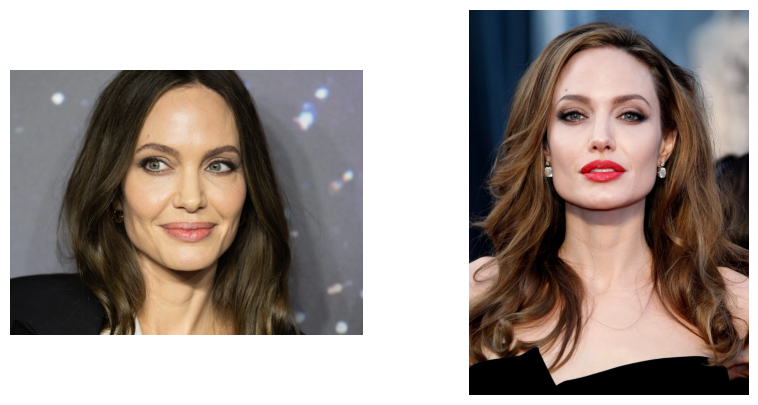

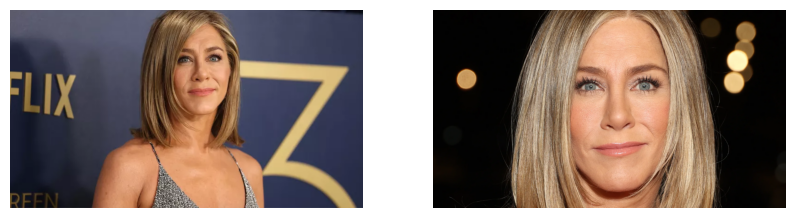

In [13]:
# Define the number of nearest neighbors to search for
k = 1
for img in test:
  features = extract_features_facenet(img, resnet, mtcnn)
  D, I = index.search(features.reshape(1, -1), k)
  imgpaths = [img, images[I[0][0]]]
  show_images_side_by_side(imgpaths)